<a href="https://colab.research.google.com/github/subhashpolisetti/AutoGluon_ML_End-to-End_Implementations_Part-2/blob/main/1_AutoGluon_Text_Classification_and_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Classification and Similarity using AutoGluon**

This notebook demonstrates the use of **AutoGluon** for performing text classification and similarity prediction tasks. It includes:

---

## **1. Installation and Setup**
- Installs and configures necessary libraries such as `autogluon.multimodal` and PyTorch.
- Ensures the environment is ready for text-based machine learning tasks.

---

## **2. Sentiment Classification**
### **Objective**:
Classify sentences into **positive** or **negative** sentiments.

### **Dataset**:
- Training and test datasets are loaded from [AutoGluon Text Dataset](https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/).
- Dataset includes labeled sentences for binary classification.

### **Steps**:
1. **Model Initialization**: `MultiModalPredictor` is used for binary classification with `accuracy` as the evaluation metric.
2. **Training**: Model is trained on a sampled subset of the data.
3. **Evaluation**:
   - Metrics like **accuracy** and **F1-score** are computed on test data.
4. **Prediction**:
   - Predict sentiment labels for new sentences.
   - Display class probabilities for predictions.

### **Visualization**:
- TSNE is used to visualize embeddings, highlighting how the model distinguishes between classes.

---

## **3. Sentence Similarity**
### **Objective**:
Predict the similarity score between two sentences on a scale of 0 (dissimilar) to 5 (identical).

### **Dataset**:
- Semantic textual similarity dataset from [AutoGluon Text Dataset](https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/).
- Includes sentence pairs with human-annotated similarity scores.

### **Steps**:
1. **Model Initialization**: `MultiModalPredictor` configured for regression tasks.
2. **Training**: Model trains on the sentence similarity dataset.
3. **Evaluation**:
   - Metrics such as **RMSE**, **Pearson Correlation**, and **Spearman Rank Correlation**.
4. **Prediction**:
   - Predict similarity scores for given sentence pairs.

---

## **4. Additional Features**
### **Saving and Loading Models**:
- Save trained models using `predictor.save()`.
- Reload saved models with `MultiModalPredictor.load()`.

### **Embedding Extraction**:
- Extract text embeddings for downstream tasks or visualization.

### **Hardware Utilization**:
- Currently runs on **CPU** with the ability to extend to GPU-based systems.

---

## **5. Usage Examples**
- Sentiment Prediction:
  - Example Sentences:
    - *"It's a charming and often affecting journey."*
    - *"It's slow, very, very slow."*
  - Outputs:
    - Sentiment labels: Positive (1) or Negative (0).
    - Class probabilities.

- Sentence Similarity:
  - Example Pairs:
    - *"A child is riding a horse."*
    - *"The young boy is riding a horse."*
  - Output:
    - Similarity Score: **4.5** (highly similar).

---

This notebook serves as a comprehensive guide to text-based machine learning using **AutoGluon**, covering all steps from data loading to evaluation and visualization.


In [ ]:
# Install the AutoGluon library for multimodal tasks
!pip install autogluon.multimodal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime

In [ ]:
# Import required libraries
%matplotlib inline
import numpy as np
import warnings
import matplotlib.pyplot as plt

# Suppress warnings to keep the output clean
warnings.filterwarnings('ignore')

In [ ]:
# Load training and testing datasets from AutoGluon dataset repository
from autogluon.core.utils.loaders import load_pd
train_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/train.parquet')
test_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/dev.parquet')

# Sample a subset of the training data for faster processing
ss = 1000
train_data = train_data.sample(n=ss, random_state=0)

# Display the first 10 rows of the training data
train_data.head(10)


Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/train.parquet | Columns = 2 / 2 | Rows = 67349 -> 67349
Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/dev.parquet | Columns = 2 / 2 | Rows = 872 -> 872


,sentence,label
43787,very pleasing at its best moments,1
16159,", american chai is enough to make you put away...",0
59015,too much like an infomercial for ram dass 's l...,0
5108,a stirring visual sequence,1
67052,cool visual backmasking,1
35938,hard ground,0
49879,"the striking , quietly vulnerable personality ...",1
51591,pan nalin 's exposition is beautiful and myste...,1
56780,wonderfully loopy,1
28518,"most beautiful , evocative",1


In [ ]:
# Uninstall and reinstall compatible versions of PyTorch to avoid conflicts
!pip uninstall torch torchaudio -y


Found existing installation: torch 2.3.1
Uninstalling torch-2.3.1:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/torch-2.3.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? Y
  Successfully uninstalled torch-2.3.1
Found existing installation: torchaudio 2.4.1+cu121
Uninstalling torchaudio-2.4.1+cu121:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torchaudio-2.4.1+cu121.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torchaudio/*
    /usr/local/lib/python3.10/dist-packages/torio/*
Proceed (Y/n)? Y
  Successfully uninstalled torchaudio-2.4.1+cu121


In [ ]:
!pip install torch torchvision torchaudio

  Using cached torch-2.3.1-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
Using cached torch-2.3.1-cp310-cp310-manylinux1_x86_64.whl (779.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 5.9 MB/s eta 0:00:00


In [ ]:
import torch
import torchaudio
print(torch.__version__)
print(torchaudio.__version__)

2.3.1+cu121
2.3.1+cu121


In [ ]:
from autogluon.multimodal import MultiModalPredictor
import uuid
m = f"./tmp/{uuid.uuid4().hex}-automm_sst"
predictor = MultiModalPredictor(label='label', eval_metric='acc', path=m)
predictor.fit(train_data, time_limit=180)

=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.3.1+cu121
CUDA Version:       CUDA is not available
Memory Avail:       10.51 GB / 12.67 GB (83.0%)
Disk Space Avail:   66.93 GB / 107.72 GB (62.1%)
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /content/tmp/91b9d0781161

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

GPU Count: 0
GPU Count to be Used: 0

/usr/local/lib/python3.10/dist-packages/autogluon/multimodal/utils/environment.py:131: UserWarning: Only CPU is detected in the instance. This may result in slow speed for MultiModalPredictor. Consider using an instance with GPU support.
  warnings.warn(
INFO: GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: 
  | Name              | Type                         | Params | Mode 
---------------------------------------------------------------------------
0 | model             | HFAutoModelForTextPrediction | 108 M  | train
1 | validation_metric | MulticlassAccuracy           | 0      | train
2 | loss_func         | CrossEntropyLoss             | 0      | train
---------------------------------------------------------------------------
108 M     Trainable params
0         Non-trainable params
108 M     Total params
435.573   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 3: 'val_acc' reached 0.54500 (best 0.54500), saving model to '/content/tmp/91b9d07811614bd5a2102c3407a213c1-automm_sst/epoch=0-step=3.ckpt' as top 3
INFO: Time limit reached. Elapsed time is 0:04:39. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/91b9d07811614bd5a2102c3407a213c1-automm_sst")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [ ]:
t = predictor.evaluate(test_data)
print(t)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

{'acc': 0.5103211009174312}


In [ ]:
t = predictor.evaluate(test_data, metrics=['acc', 'f1'])
print(t)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

{'acc': 0.5103211009174312, 'f1': 0.6613798572561458}


In [ ]:
sentence1 = "it's a charming and often affecting journey."
sentence2 = "It's slow, very, very, very slow."
predictions = predictor.predict({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Sentiment":', predictions[0])
print('"Sentence":', sentence2, '"Predicted Sentiment":', predictions[1])

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


"Sentence": it's a charming and often affecting journey. "Predicted Sentiment": 1
"Sentence": It's slow, very, very, very slow. "Predicted Sentiment": 0


In [ ]:
probs = predictor.predict_proba({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Class-Probabilities":', probs[0])
print('"Sentence":', sentence2, '"Predicted Class-Probabilities":', probs[1])

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


"Sentence": it's a charming and often affecting journey. "Predicted Class-Probabilities": [0.34515423 0.6548457 ]
"Sentence": It's slow, very, very, very slow. "Predicted Class-Probabilities": [0.5155579  0.48444217]


In [ ]:
tp = predictor.predict(test_data)
tp.head()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


,label
0,1
1,1
2,1
3,1
4,0


In [ ]:
loaded_predictor = MultiModalPredictor.load(m)
loaded_predictor.predict_proba({'sentence': [sentence1, sentence2]})

Load pretrained checkpoint: /content/tmp/91b9d07811614bd5a2102c3407a213c1-automm_sst/model.ckpt
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


array([[0.34515423, 0.6548457 ],
       [0.5155579 , 0.48444217]], dtype=float32)

In [ ]:
new_model_path = f"./tmp/{uuid.uuid4().hex}-automm_sst"
loaded_predictor.save(new_model_path)
loaded_predictor2 = MultiModalPredictor.load(new_model_path)
loaded_predictor2.predict_proba({'sentence': [sentence1, sentence2]})

Load pretrained checkpoint: /content/tmp/555761d3eb104f2a9de3c0ffdf6ca775-automm_sst/model.ckpt
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


array([[0.34515423, 0.6548457 ],
       [0.5155579 , 0.48444217]], dtype=float32)

In [ ]:
e = predictor.extract_embedding(test_data)
print(e.shape)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


(872, 768)


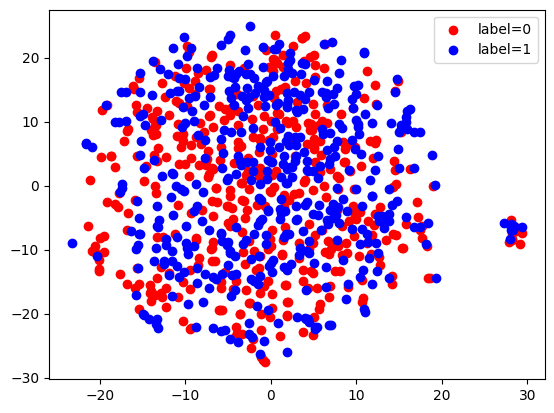

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, random_state=123).fit_transform(embeddings)
for val, color in [(0, 'red'), (1, 'blue')]:
    idx = (test_data['label'].to_numpy() == val).nonzero()
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], c=color, label=f'label={val}')
plt.legend(loc='best')

In [ ]:
sts_train_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/train.parquet')[['sentence1', 'sentence2', 'score']]
sts_test_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/dev.parquet')[['sentence1', 'sentence2', 'score']]
sts_train_data.head(10)

Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/train.parquet | Columns = 4 / 4 | Rows = 5749 -> 5749
Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/dev.parquet | Columns = 4 / 4 | Rows = 1500 -> 1500


,sentence1,sentence2,score
0,A plane is taking off.,An air plane is taking off.,5.00
1,A man is playing a large flute.,A man is playing a flute.,3.80
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80
3,Three men are playing chess.,Two men are playing chess.,2.60
4,A man is playing the cello.,A man seated is playing the cello.,4.25
5,Some men are fighting.,Two men are fighting.,4.25
6,A man is smoking.,A man is skating.,0.50
7,The man is playing the piano.,The man is playing the guitar.,1.60
8,A man is playing on a guitar and singing.,A woman is playing an acoustic guitar and sing...,2.20
9,A person is throwing a cat on to the ceiling.,A person throws a cat on the ceiling.,5.00


In [ ]:
print('Min score=', min(sts_train_data['score']), ', Max score=', max(sts_train_data['score']))

Min score= 0.0 , Max score= 5.0


In [ ]:
sts_model_path = f"./tmp/{uuid.uuid4().hex}-automm_sts"
predictor_sts = MultiModalPredictor(label='score', path=sts_model_path)
predictor_sts.fit(sts_train_data, time_limit=60)

=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.3.1+cu121
CUDA Version:       CUDA is not available
Memory Avail:       7.41 GB / 12.67 GB (58.5%)
Disk Space Avail:   65.66 GB / 107.72 GB (61.0%)
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and label-values can't be converted to int).
	Label info (max, min, mean, stddev): (5.0, 0.0, 2.701, 1.4644)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you ha

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Time limit reached. Elapsed time is 0:01:05. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/c0b2593976b4467fadadd893971b849c-automm_sts")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [ ]:
test_score = predictor_sts.evaluate(sts_test_data, metrics=['rmse', 'pearsonr', 'spearmanr'])
print('RMSE = {:.2f}'.format(test_score['rmse']))
print('PEARSONR = {:.4f}'.format(test_score['pearsonr']))
print('SPEARMANR = {:.4f}'.format(test_score['spearmanr']))

Predicting: |          | 0/? [00:00<?, ?it/s]

RMSE = 1.45
PEARSONR = 0.3313
SPEARMANR = 0.3112


In [ ]:
sentences = ['The child is riding a horse.',
             'The young boy is riding a horse.',
             'The young man is riding a horse.',
             'The young man is riding a bicycle.']

s1 = predictor_sts.predict({'sentence1': [sentences[0]],
                                'sentence2': [sentences[1]]}, as_pandas=False)

s2 = predictor_sts.predict({'sentence1': [sentences[0]],
                                'sentence2': [sentences[2]]}, as_pandas=False)

s3 = predictor_sts.predict({'sentence1': [sentences[0]],
                                'sentence2': [sentences[3]]}, as_pandas=False)
print(s1, s2, s3)

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

2.5426636 2.6705198 2.4033961
